In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_rows", 400)
import geopandas as gpd
import plotly.express as px


# Data cleaning

In [70]:
wine = pd.read_csv("wines_SPA.csv")

In [7]:
wine

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [9]:
wine.acidity.unique()

array([ 3.,  2.,  1., nan])

In [10]:
wine.acidity.value_counts()

3.0    6028
2.0     268
1.0      35
Name: acidity, dtype: int64

In [11]:
wine.loc[wine.body.isna()]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
288,Francisco Garcia Perez,Adega do Moucho Treixadura,2017,4.6,53,Espana,Ribeiro,34.50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7440,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90000,NaN,NaN,NaN
7462,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95000,NaN,NaN,NaN
7465,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90000,NaN,NaN,NaN
7487,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95000,NaN,NaN,NaN


In [12]:
wine.type = wine.type.fillna("Red")    

In [13]:
wine.body = wine.body.fillna("0").astype(float)

In [14]:
wine.acidity = wine.acidity.fillna("0").astype(float)

In [15]:
wine.acidity.unique()

array([3., 2., 1., 0.])

In [16]:
index = wine.loc[wine.wine.str.contains("Blanco")].wine.index

In [17]:
red_wine = wine.drop(index).copy()

In [18]:
wine.type.unique()

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Sherry', 'Priorat Red', 'Rioja Red', 'Rioja White',
       'Grenache', 'Cava', 'Verdejo', 'Syrah', 'Monastrell', 'Mencia',
       'Sparkling', 'Montsant Red', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)

In [19]:
index1 = red_wine.loc[red_wine.type == "Rioja White"].index

In [20]:
clear_red_wine = red_wine.drop(index1)

In [21]:
clear_red_wine.price = clear_red_wine.price.astype(int)

In [22]:
red = clear_red_wine

In [23]:
# Before I drop unnecessary data and got only red wine
red

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64,Ribera Del Duero Red,5.0,3.0


In [24]:
#red.year = red.year.str.replace("2000","2001",regex = False)

In [46]:
red.year[851] = 2012

/var/folders/xf/_9db89vs2kz_xgykl0vhztn80000gn/T/ipykernel_72169/1085282835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red.year[851] = 2012


In [47]:
red.year[851]

2012

In [48]:
red.year[46] = 2021

/var/folders/xf/_9db89vs2kz_xgykl0vhztn80000gn/T/ipykernel_72169/3997845044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red.year[46] = 2021


In [45]:
red.year = red.year.str.replace("N.V.","2001", regex = False)

In [54]:
red.year = red.year.astype(int)

# EDA

In [55]:
red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7384 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7384 non-null   object 
 1   wine         7384 non-null   object 
 2   year         7384 non-null   int64  
 3   rating       7384 non-null   float64
 4   num_reviews  7384 non-null   int64  
 5   country      7384 non-null   object 
 6   region       7384 non-null   object 
 7   price        7384 non-null   int64  
 8   type         7384 non-null   object 
 9   body         7384 non-null   float64
 10  acidity      7384 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 950.3+ KB


<AxesSubplot:xlabel='price'>

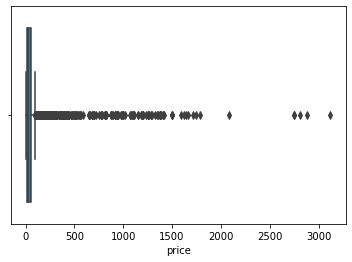

In [56]:
sns.boxplot(data = red, x = "price")

<AxesSubplot:xlabel='price', ylabel='Count'>

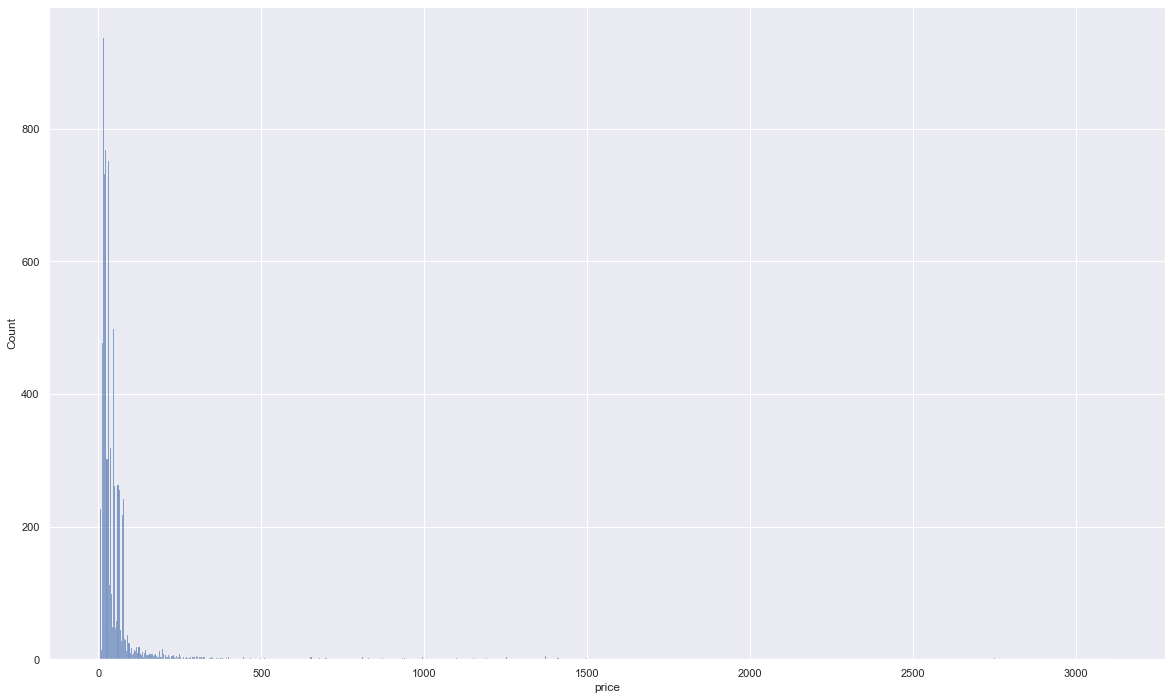

In [230]:
sns.histplot(red.price)
#sns.set(rc = {"figure.figsize" : (20,12) })

In [1]:
sns.countplot(data = red, y = "year")

NameError: name 'sns' is not defined

In [74]:
red.year = red.year.astype(int)

<AxesSubplot:xlabel='rating', ylabel='Count'>

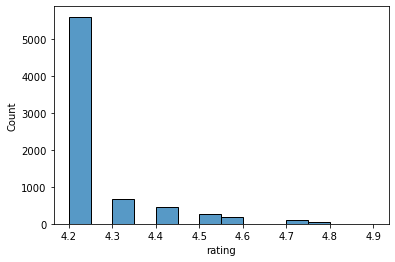

In [75]:
sns.histplot(data = red, x = "rating")

<AxesSubplot:xlabel='count', ylabel='region'>

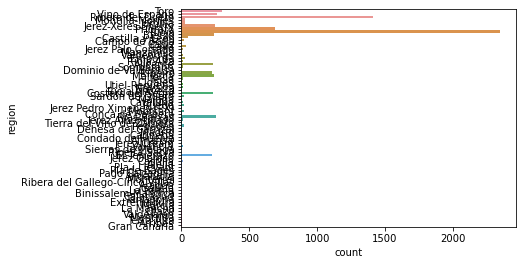

In [76]:
sns.countplot(data = red,y = "region")

<AxesSubplot:xlabel='price', ylabel='region'>

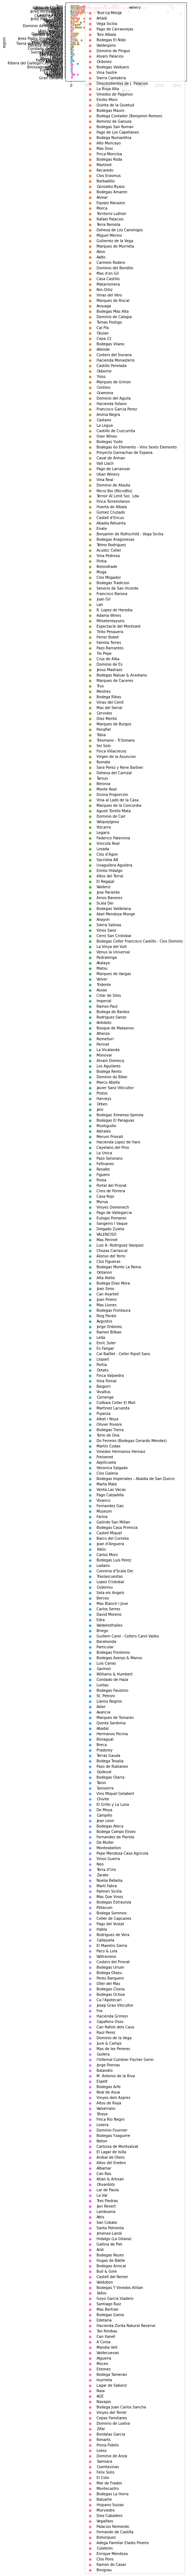

In [77]:
sns.scatterplot(data = red, x = "price", y = "region", hue= "winery")

# Vizualizations

In [2]:
# I decided to classify wine with vinegar into 5 groups

wine_wine = [] 
for i in red["price"]:
    if 100 >= i :
        wine_wine.append("1~100")
    elif 101 <= i <499:
        wine_wine.append("101~499")
    elif 500 <= i < 1000:
        wine_wine.append("500~1000")
    elif 1001 <= i < 1600:
        wine_wine.append("1001~1600")
    elif  i > 1601: 
        wine_wine.append("1601+")
    else:
        wine_wine.append("problem")
#wine_wine

NameError: name 'red' is not defined

In [79]:
red["price_category"] = wine_wine

In [81]:
red.price_category.unique()

array(['500~1000', '101~499', '1601+', '1001~1600', '1~100'], dtype=object)

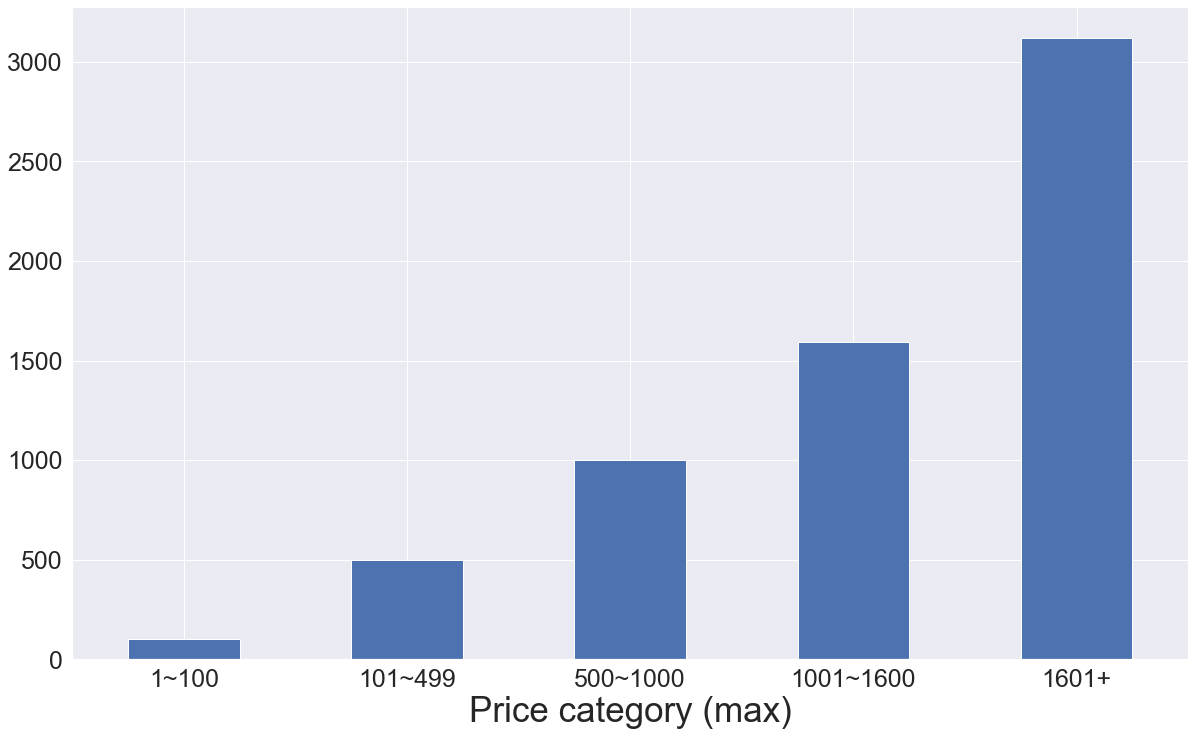

In [129]:
red.groupby("price_category").price.max().sort_values().plot(kind = "bar", figsize = (20,12))
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25, rotation = 0)
plt.xlabel("Price category (max)", fontsize =35)
plt.show()

In [83]:
red.groupby("price_category").price.min().sort_values()

price_category
1~100           4
101~499       101
500~1000      500
1001~1600    1021
1601+        1620
Name: price, dtype: int64

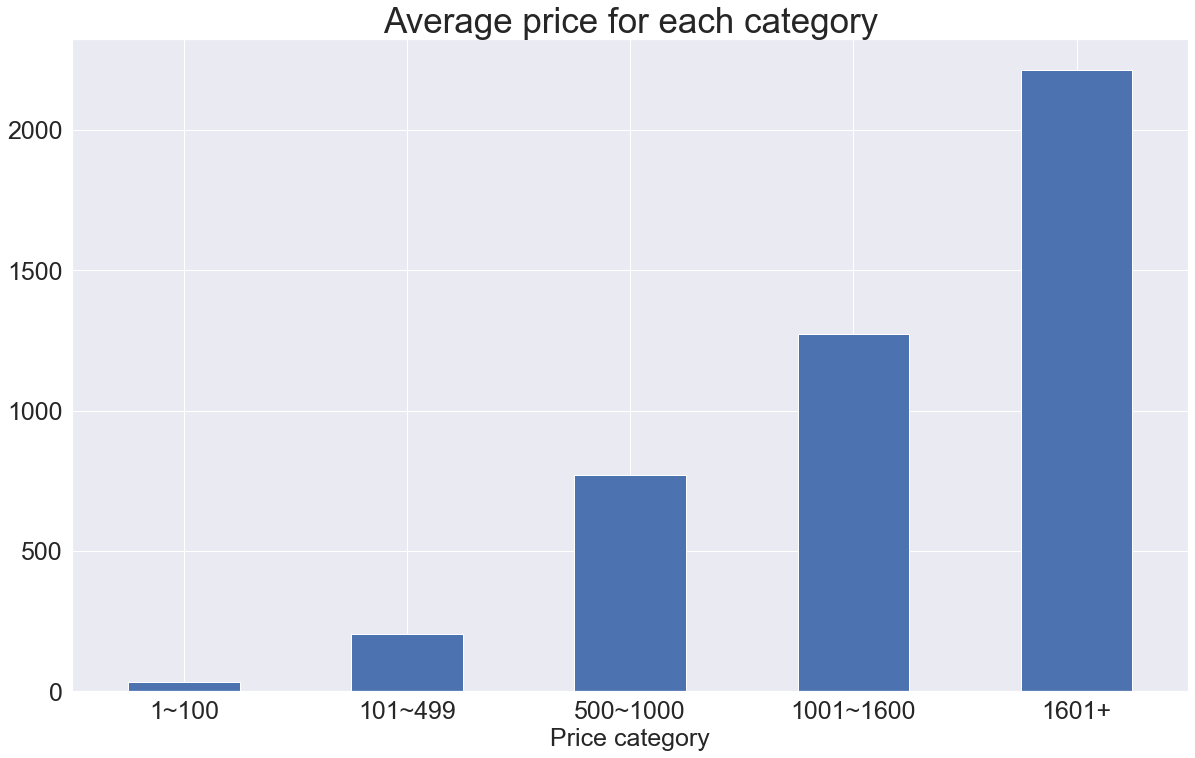

In [356]:
red.groupby("price_category").price.mean().sort_values().plot(kind = "bar", figsize = (20,12))
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25, rotation = 0)
plt.xlabel("Price category", fontsize =25)
plt.ylabel("C")
plt.title("Average price for each category", fontsize = 35)
plt.show()

In [3]:
# Quantify bottles for each group
red.groupby("price_category").price.count().sort_values().plot(kind = "bar", figsize = (20,12))
plt.ylabel("")

NameError: name 'red' is not defined

In [86]:
#red.groupby("year")["price","wine","winery"].min()

/var/folders/xf/_9db89vs2kz_xgykl0vhztn80000gn/T/ipykernel_72169/3425089451.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  red.groupby("year")["price","wine","winery"].min()


,price,wine,winery
year,,,
1910,701,Gines Liebana Pedro Ximenez,Toro Albala
1922,280,Rioja Reserva Especial,Martinez Lacuesta
1925,532,Castillo Ygay Gran Reserva Especial Tinto,Marques de Murrieta
1928,270,Gran Reserva,Federico Paternina
1929,227,Don PX Convento Seleccion,Toro Albala
1931,244,Don PX Convento Seleccion,Toro Albala
1942,680,Castillo Ygay Gran Reserva Especial Tinto,Marques de Murrieta
1946,285,Don PX Convento Seleccion,Toro Albala
1949,295,Don PX Seleccion,Toro Albala


In [239]:
#red.groupby("year")["price","wine","winery","region"].max()

/var/folders/xf/_9db89vs2kz_xgykl0vhztn80000gn/T/ipykernel_72169/3072156897.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  red.groupby("year")["price","wine","winery","region"].max()


,price,wine,winery,region
year,,,,
1910,701,Gines Liebana Pedro Ximenez,Toro Albala,Montilla-Moriles
1922,280,Rioja Reserva Especial,Martinez Lacuesta,Rioja Alta
1925,532,Castillo Ygay Gran Reserva Especial Tinto,Marques de Murrieta,Rioja
1928,270,Gran Reserva,Federico Paternina,Rioja
1929,227,Don PX Convento Seleccion,Toro Albala,Montilla-Moriles
1931,244,Don PX Convento Seleccion,Toro Albala,Montilla-Moriles
1942,680,Castillo Ygay Gran Reserva Especial Tinto,Marques de Murrieta,Rioja
1946,350,Don PX Pedro Ximenez,Toro Albala,Montilla-Moriles
1949,295,Don PX Seleccion,Toro Albala,Montilla-Moriles


In [20]:
# The trend of winemaking development between min & max price by Year

red.groupby("year")["price"].max().plot(figsize = (20,12))
red.groupby("year")["price"].min().plot(figsize = (20,12))

plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.xlabel("Year", fontsize =30)
plt.title("Min & Max Price by Year", fontsize = 30)

plt.show()

NameError: name 'red' is not defined

In [19]:
# Top 3 bottles by rating in category between 1001-1600eu
list(red.groupby("price_category")[["rating","winery","wine",
                                    "price"]])[0][1].sort_values("rating",ascending = False)[0:3]#.plot(kind= "bar")

NameError: name 'red' is not defined

In [18]:
# Top 3 bottles by rating in category between 101-499eu
list(red.groupby("price_category")[["rating","winery","wine",
                                    "price"]])[1][1].sort_values("rating",ascending = False)[0:3]

NameError: name 'red' is not defined

In [17]:
# Top 3 bottles by rating in category after 1601eu
list(red.groupby("price_category")[["rating","winery","wine",
                                    "price"]])[2][1].sort_values("rating",ascending = False)[0:3]

NameError: name 'red' is not defined

In [16]:
# Top 3 bottles by rating in category between 1-100eu
list(red.groupby("price_category")[["rating","winery","wine",
                                    "price"]])[3][1].sort_values("rating",ascending = False)[0:3]

NameError: name 'red' is not defined

In [15]:
# Top wine by rating between 500-100eu
list(red.groupby("price_category")[["rating","winery","wine",
                                    "price"]])[4][1].sort_values("rating",ascending = False)[0:3]

NameError: name 'red' is not defined

<AxesSubplot:xlabel='price_category', ylabel='rating'>

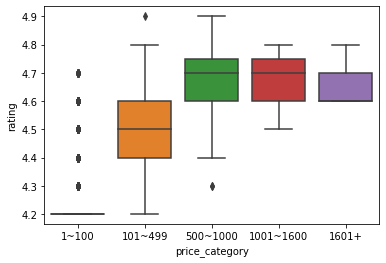

In [95]:
sns.boxplot(data =red, x = "price_category", y = "rating", order=['1~100','101~499','500~1000','1001~1600','1601+'])

<AxesSubplot:xlabel='price_category', ylabel='rating'>

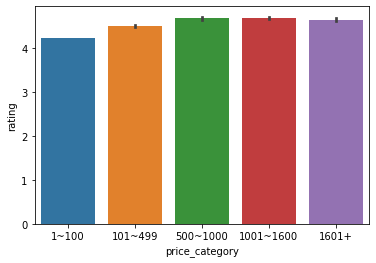

In [96]:
sns.barplot(data =red, x = "price_category", y = "rating", order=['1~100','101~499','500~1000','1001~1600','1601+'])

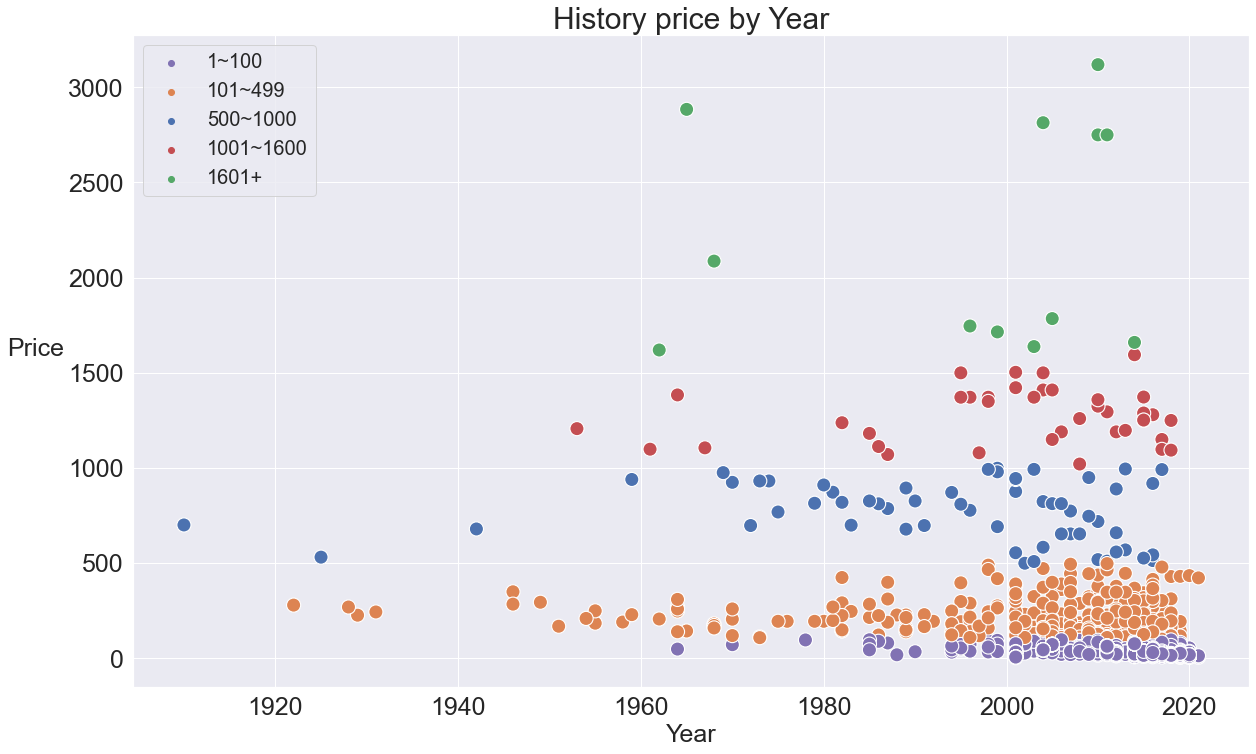

In [304]:
sns.scatterplot(data = red, x = "year", y = "price", hue = "price_category", s = 200)
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
sns.set(rc = {'figure.figsize':(20,12)})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel("Price", fontsize = 25, rotation = 0, ha = "right")
plt.xlabel("Year", fontsize = 25)
plt.legend(loc = "upper left", fontsize = 20)
plt.rc("legend", fontsize = 20)
plt.title("History price by Year", fontsize = 30)

#specify order of items in legend
#order = ['1~100','101~499','500~1000','1001~1600','1601+']
order = [4,1,0,3,2]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
#red.corr()
plt.show()

In [14]:
# Correlation for luxury wines
red.loc[red.price_category == "1601+"].corr()

NameError: name 'red' is not defined

In [13]:
sns.scatterplot(data = red, y = "region", x = "price", hue = "price_category", s = 200)
plt.ylabel("Region", fontsize = 20,rotation = 0, ha = "right")
plt.xlabel("Price", fontsize = 20)
plt.yticks(fontsize = 12)
plt.title("Producing of all regions", fontsize = 25)

order = [4,1,0,3,2]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
#red.corr()

plt.show()

NameError: name 'sns' is not defined

In [12]:
# Count bottles for each region
red.groupby("region").count().price.sort_values(ascending = False)

NameError: name 'red' is not defined

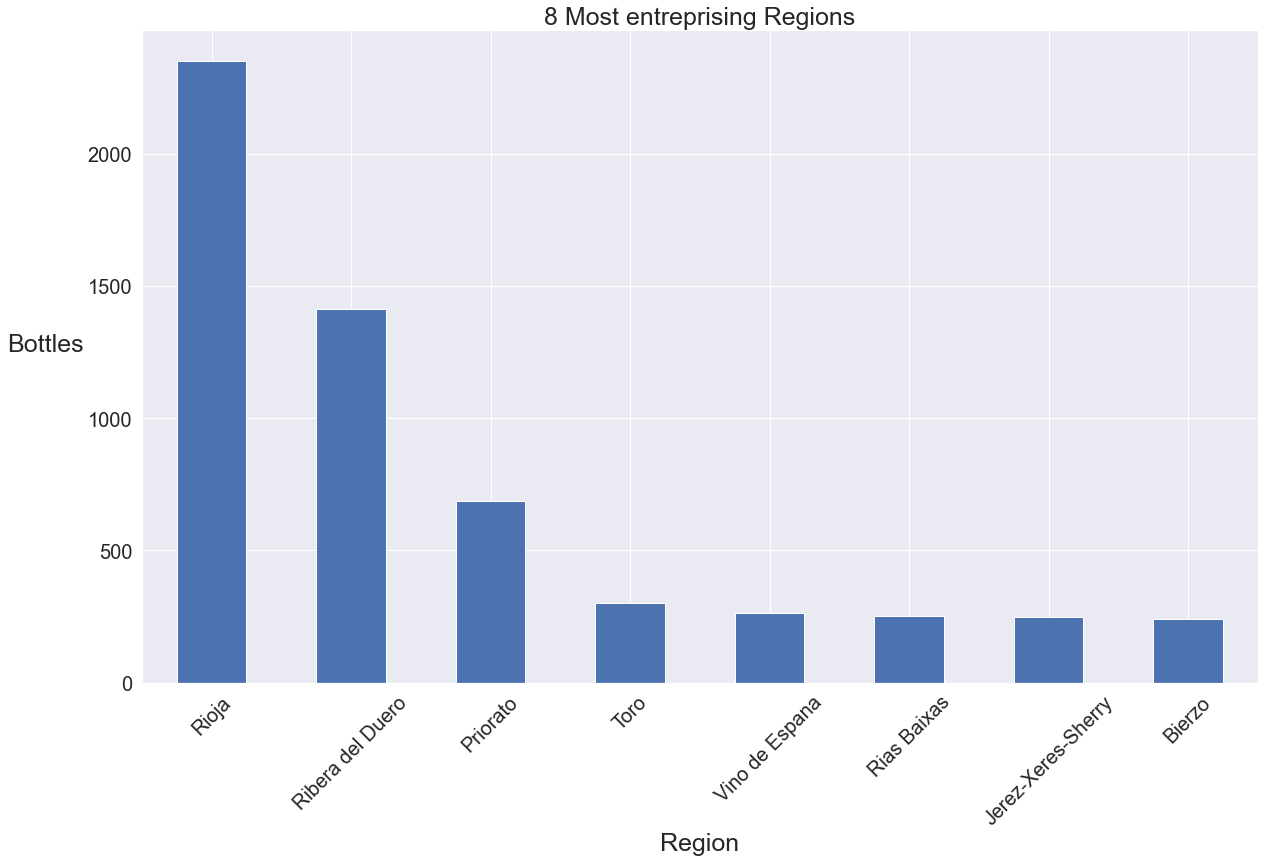

In [341]:
red.groupby("region").count().price.sort_values(ascending = False)[0:8].plot(kind = "bar")
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks( fontsize = 20)
plt.xlabel("Region", fontsize = 25)
plt.ylabel("Bottles", fontsize = 25, rotation = 0, ha = "right")
plt.title("8 Most entreprising Regions", fontsize = 25)
plt.show()

In [4]:
sns.boxenplot(data = red.loc[red.region.isin(["Rioja", "Ribera del Duero", "Priorato"])] ,
                           x = "price", y = "region", hue = "price_category")
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks( fontsize = 20)
plt.xlabel("Price", fontsize = 25)
plt.ylabel("Region", fontsize = 25, rotation = 0)
plt.title("Price category for Top 3 producers", fontsize = 25)

order = [4,1,0,3,2]

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
#red.corr()
plt.show()

NameError: name 'sns' is not defined

In [5]:
sns.barplot(data = red.loc[red.region.isin(["Rioja", "Ribera del Duero", "Priorato"])] ,
                           y = "price", x = "region", hue = "rating", ci = None)
plt.xlabel("Region", fontsize = 20)
plt.ylabel("Price", fontsize = 20, rotation = 0, ha = "right")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Rating for Top 3 Regions", fontsize = 20)
plt.show()

NameError: name 'sns' is not defined

<AxesSubplot:xlabel='region', ylabel='price'>

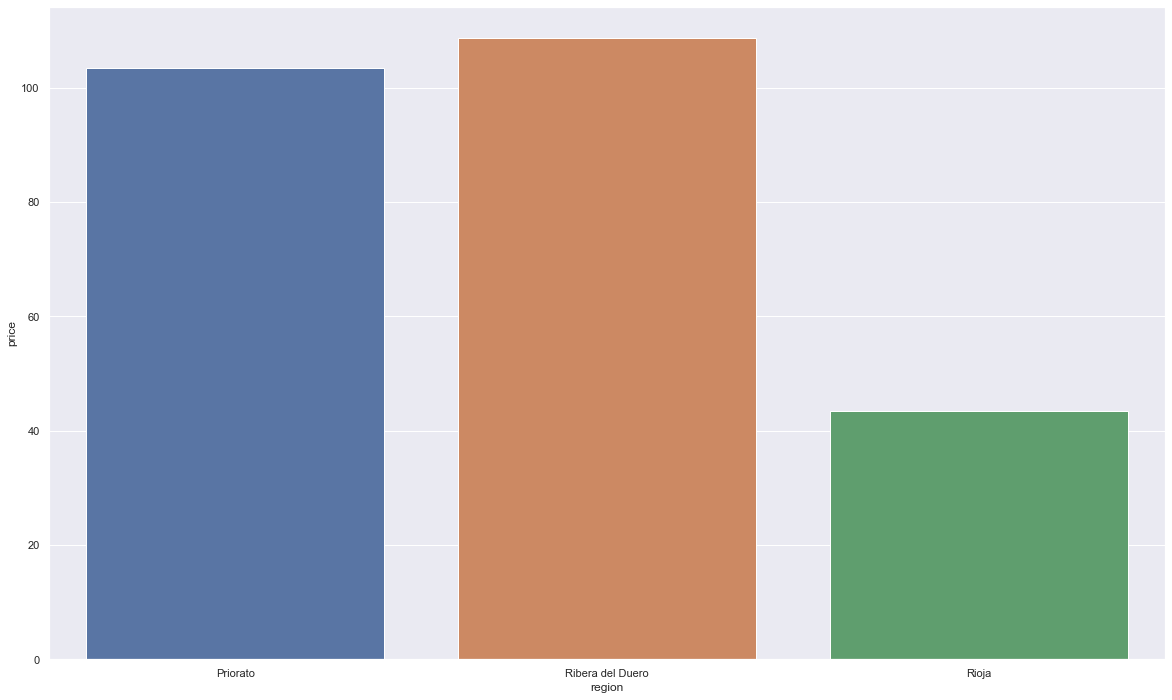

In [214]:
sns.barplot(data = red.loc[red.region.isin(["Rioja", "Ribera del Duero", "Priorato"])].sort_values(["region","price"]) ,
                           x = "region", y = "price", ci = None)

In [209]:
red.loc[red.region.isin(["Rioja", "Ribera del Duero", "Priorato"])].sort_values(["region","price"]).price.nlargest()

196    2884
280    2750
343    2750
92     2087
188    1785
Name: price, dtype: int64

In [11]:
sns.barplot(data = red.loc[red.region.isin(["Rioja", "Ribera del Duero", "Priorato"])] ,
                           x = "price", y = "region", hue = "price_category", ci = None)
order = [4,1,0,3,2]

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
plt.show()

NameError: name 'sns' is not defined

<AxesSubplot:xlabel='price', ylabel='region'>

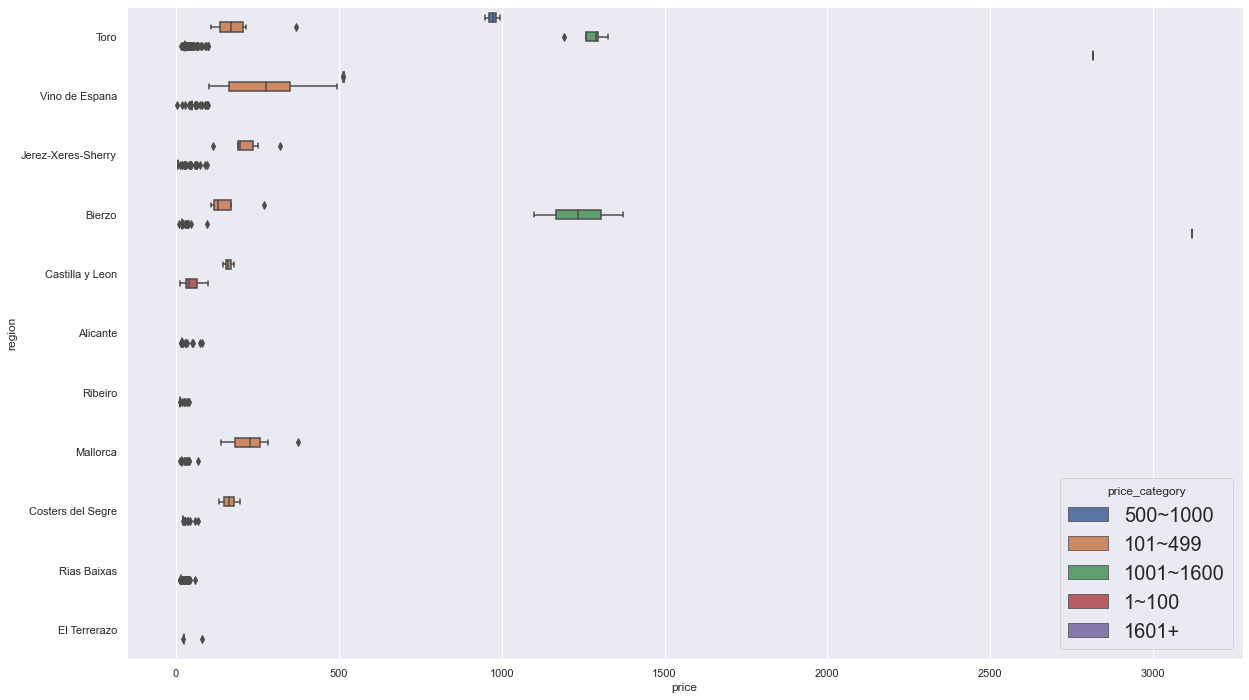

In [179]:
sns.boxplot(data = red.loc[red.region.isin(["Toro",
"Vino de Espana",
"Rias Baixas",
"Jerez-Xeres-Sherry", 
"Bierzo",                                           
"Mallorca",
"Alicante",
"Costers del Segre",
"Ribeiro",
"El Terrerazo",
"Castilla y Leon"])] ,
                           x = "price", y = "region", hue = "price_category")

In [10]:
# Wineries who sell more than 200 bottles
sns.countplot(data = red.loc[red.winery.isin(cont.index)], y = "winery")

NameError: name 'sns' is not defined

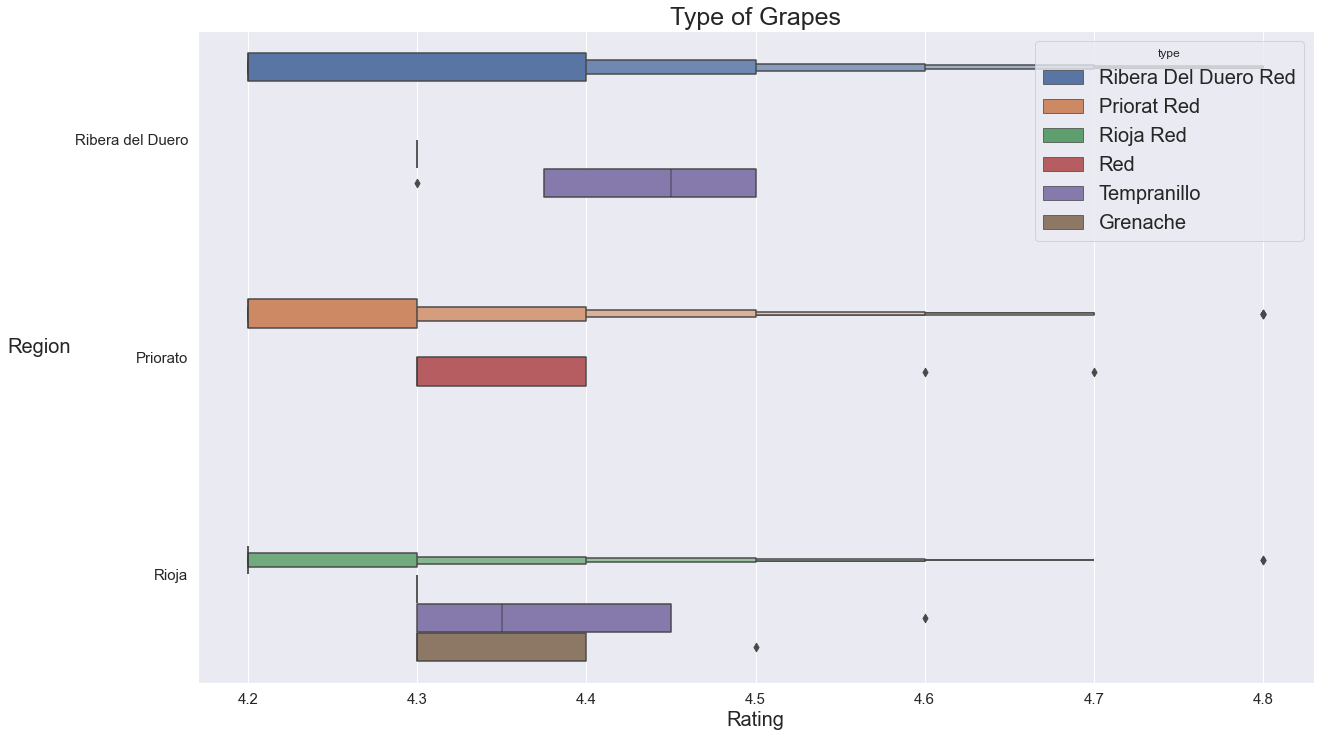

In [287]:
sns.boxenplot(data = red.loc[red.region.isin(["Rioja", "Ribera del Duero", "Priorato"])] ,
                           x = "rating", y = "region", hue = "type")
plt.title("Type of Grapes", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Rating", fontsize = 20)
plt.ylabel("Region", fontsize = 20,rotation = 0, ha = "right")
plt.show()

In [320]:
boom = red.loc[red.region.isin(["Rioja", "Ribera del Duero"])]

In [9]:
# Looking throw Tempranillo grape type by price and year
bm1 = boom.loc[boom.type == "Tempranillo"]
bm1.year = bm1.year.astype(object)
sns.scatterplot(data = bm1, y = "price", x = "year", s = 300)

NameError: name 'boom' is not defined

In [6]:
# Total wineries who produce less than 50 bottles 
sns.boxplot(data = red.loc[red.winery.isin(cont.index)], y = "winery", x = "price", hue = "price_category")

NameError: name 'sns' is not defined

In [109]:
cont = pd.DataFrame(red.winery.value_counts(ascending = False))

In [110]:
cont = cont.loc[cont.winery >= 50]

In [111]:
cont.index

Index(['Contino', 'Artadi', 'La Rioja Alta', 'Sierra Cantabria', 'Matarromera',
       'Vina Pedrosa', 'Imperial', 'Losada', 'Sei Solo', 'Ramon Bilbao',
       'Portal del Priorat', 'Matsu', 'Lustau', 'Bodegas La Horra', 'Campillo',
       'La Vicalanda', 'Conreria d'Scala Dei', 'Mustiguillo', 'Mar de Frades',
       'Binigrau', 'Enrique Mendoza', 'Ramon do Casar', 'Clos Pons',
       'Vinedos de Paganos', 'Vega Sicilia'],
      dtype='object')

In [112]:
red.loc[red.winery.isin(cont.index)]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,price_category
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313,Tempranillo,4.0,2.0,101~499
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324,Ribera Del Duero Red,5.0,3.0,101~499
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692,Ribera Del Duero Red,5.0,3.0,500~1000
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778,Ribera Del Duero Red,5.0,3.0,500~1000
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490,Ribera Del Duero Red,5.0,3.0,101~499
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19,Rioja Red,4.0,3.0,1~100
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16,Priorat Red,4.0,3.0,1~100
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24,Red,4.0,3.0,1~100
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64,Ribera Del Duero Red,5.0,3.0,1~100


In [113]:
red.num_reviews

0         58
1         31
2       1793
3       1705
4       1309
        ... 
7495     392
7496     390
7497     390
7498     389
7499     388
Name: num_reviews, Length: 7384, dtype: int64

(0.0, 100.0)

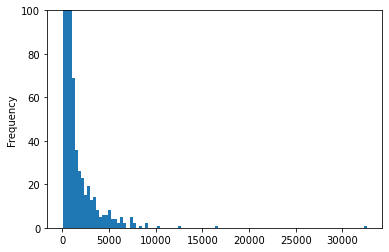

In [115]:
red.num_reviews.plot(kind = "hist", bins = 100)
plt.ylim(0,100)

In [8]:
# Count reviews for 1 bottle 
sns.boxplot(data = red, x = "num_reviews")

NameError: name 'sns' is not defined

In [7]:
# Top 5 bottles by review 
red.loc[red.num_reviews.nlargest().index]

NameError: name 'red' is not defined

In [118]:
red.loc[red.num_reviews.nsmallest().index]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,price_category
345,Vina Pedrosa,40 Aniversario Gran Reserva,2012,4.6,25,Espana,Ribera del Duero,95,Ribera Del Duero Red,5.0,3.0,1~100
346,Osborne,Solera BC-200,2001,4.6,25,Espana,Jerez-Xeres-Sherry,197,Sherry,4.0,3.0,101~499
347,Recaredo,Corpinnat Enoteca Reserva Particular de Recaredo,2004,4.6,25,Espana,Cataluna,130,Sparkling,2.0,3.0,101~499
348,Toro Albala,Don PX Pedro Ximenez,1968,4.6,25,Espana,Montilla-Moriles,181,Pedro Ximenez,5.0,1.0,101~499
630,Pedralonga,Vendetta,2013,4.5,25,Espana,Rias Baixas,38,Albarino,0.0,0.0,1~100


In [119]:
red.loc[red.price_category == ("1601+")]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,price_category
16,Vega Sicilia,Unico,1962,4.8,295,Espana,Ribera del Duero,1620,Ribera Del Duero Red,5.0,3.0,1601+
92,Vega Sicilia,Unico,1968,4.7,225,Espana,Ribera del Duero,2087,Ribera Del Duero Red,5.0,3.0,1601+
98,Dominio de Pingus,Pingus,1999,4.7,184,Espana,Ribera del Duero,1715,Ribera Del Duero Red,5.0,3.0,1601+
115,Bodega Numanthia,Termanthia,2004,4.7,108,Espana,Toro,2814,Toro Red,5.0,3.0,1601+
188,Dominio de Pingus,Pingus,2005,4.6,293,Espana,Ribera del Duero,1785,Ribera Del Duero Red,5.0,3.0,1601+
196,Vega Sicilia,Unico,1965,4.6,218,Espana,Ribera del Duero,2884,Ribera Del Duero Red,5.0,3.0,1601+
199,Dominio de Pingus,Pingus,2003,4.6,205,Espana,Ribera del Duero,1638,Ribera Del Duero Red,5.0,3.0,1601+
248,Dominio de Pingus,Pingus,1996,4.6,102,Espana,Ribera del Duero,1746,Ribera Del Duero Red,5.0,3.0,1601+
280,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2010,4.6,60,Espana,Priorato,2750,Priorat Red,4.0,3.0,1601+
332,Alvaro Palacios,L'Ermita Velles Vinyes Priorat,2014,4.6,30,Espana,Priorato,1660,Priorat Red,4.0,3.0,1601+


In [220]:
red.winery.value_counts().head(35)

Contino                 457
Artadi                  261
La Rioja Alta           254
Sierra Cantabria        237
Matarromera             232
Vina Pedrosa            230
Imperial                228
Losada                  227
Sei Solo                225
Ramon Bilbao            225
Portal del Priorat      225
Matsu                   224
Lustau                  223
Bodegas La Horra        223
Campillo                223
La Vicalanda            223
Conreria d'Scala Dei    223
Mustiguillo             222
Mar de Frades           222
Binigrau                220
Enrique Mendoza         220
Ramon do Casar          220
Clos Pons               220
Vinedos de Paganos      175
Vega Sicilia             97
Alvaro Palacios          48
Dominio de Pingus        31
Martinet                 30
Marques de Murrieta      30
Vina Sastre              25
Emilio Moro              25
Bodegas Roda             23
Toro Albala              23
Muga                     23
Abadia Retuerta          22
Name: winery, dtype:

In [229]:
red.loc[red.winery == "Matarromera"]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,price_category
218,Matarromera,Ribera del Duero Prestigio Pago de las Solanas,2001,4.6,145,Espana,Ribera del Duero,245,Ribera Del Duero Red,5.0,3.0,101~499
302,Matarromera,Ribera del Duero Prestigio,2016,4.6,45,Espana,Ribera del Duero,53,Ribera Del Duero Red,5.0,3.0,1~100
449,Matarromera,Ribera del Duero Prestigio,2015,4.5,190,Espana,Ribera del Duero,54,Ribera Del Duero Red,5.0,3.0,1~100
578,Matarromera,Ribera del Duero Prestigio Pago de las Solanas,2010,4.5,44,Espana,Ribera del Duero,237,Ribera Del Duero Red,5.0,3.0,101~499
636,Matarromera,Ribera del Duero Reserva,2016,4.4,4851,Espana,Ribera del Duero,31,Ribera Del Duero Red,0.0,0.0,1~100
641,Matarromera,Ribera del Duero Reserva,2017,4.4,3456,Espana,Ribera del Duero,37,Ribera Del Duero Red,0.0,0.0,1~100
742,Matarromera,Ribera del Duero Prestigio,2014,4.4,421,Espana,Ribera del Duero,41,Ribera Del Duero Red,0.0,0.0,1~100
999,Matarromera,Gran Reserva,2014,4.4,52,Espana,Ribera del Duero,74,Ribera Del Duero Red,5.0,3.0,1~100
1128,Matarromera,Ribera del Duero Reserva,2014,4.3,3660,Espana,Ribera del Duero,33,Ribera Del Duero Red,0.0,0.0,1~100
1129,Matarromera,Ribera del Duero Reserva,2015,4.3,3620,Espana,Ribera del Duero,36,Ribera Del Duero Red,0.0,0.0,1~100


In [226]:
red.loc[red.region == "Vino de Espana"].winery

1                        Artadi
146                      Artadi
190                      Artadi
206                      Artadi
208                      Artadi
211                      Artadi
221                      Artadi
231                      Artadi
236                      Artadi
241                      Artadi
305                      Artadi
308                      Artadi
323        Micro Bio (MicroBio)
327                      Artadi
476                      Artadi
511                      Artadi
530                      Artadi
542                      Artadi
565     Vina al Lado de la Casa
613                      Artadi
740                      Artadi
774                      Artadi
823                      Artadi
830                      Artadi
832                      Artadi
851                    La Unica
865                      Artadi
866                      Artadi
874                      Artadi
893                      Artadi
912                      Artadi
917     